In [2]:
#Data raken from 2020 Scottish Indices of Multiple Deprivation: https://simd.scot

# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts config of plots to be created.

#Read in the data.
#Create a dataframe.

df = pd.read_csv(r'C:\Users\Ross\Documents\jupyter_data\simd2020_withinds.csv')

In [3]:
df.head()
#Data is quite 'wide'!

,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_Age_population,SIMD2020v2_Rank,SIMD_2020v2_Percentile,SIMD2020v2_Vigintile,SIMD2020v2_Decile,SIMD2020v2_Quintile,...,drive_petrol,drive_GP,drive_post,drive_primary,drive_retail,drive_secondary,PT_GP,PT_post,PT_retail,broadband
0,S01006506,Culter,Aberdeen City,894,580,4691,68,14,7,4,...,2.540103,3.074295,1.616239,2.615747,1.544260,9.930833,8.863589,5.856135,6.023406,11%
1,S01006507,Culter,Aberdeen City,793,470,4862,70,14,7,4,...,3.915072,4.309812,2.555858,3.646697,2.849656,11.042816,9.978272,7.515000,7.926029,1%
2,S01006508,Culter,Aberdeen City,624,461,5686,82,17,9,5,...,3.323025,3.784549,1.440991,3.247325,2.062255,10.616768,8.620700,4.321493,5.770910,1%
3,S01006509,Culter,Aberdeen City,537,307,4332,63,13,7,4,...,2.622991,2.778026,2.620681,1.936908,2.160142,10.036471,7.935112,8.433328,8.329819,11%
4,S01006510,Culter,Aberdeen City,663,415,3913,57,12,6,3,...,2.115004,2.358335,2.408416,1.845672,1.784635,9.650000,5.568964,6.966429,6.632609,0%


In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

Data_Zone - 0.0%
Intermediate_Zone - 0.0%
Council_area - 0.0%
Total_population - 0.0%
Working_Age_population - 0.0%
SIMD2020v2_Rank - 0.0%
SIMD_2020v2_Percentile - 0.0%
SIMD2020v2_Vigintile - 0.0%
SIMD2020v2_Decile - 0.0%
SIMD2020v2_Quintile - 0.0%
SIMD2020v2_Income_Domain_Rank - 0.0%
SIMD2020_Employment_Domain_Rank - 0.0%
SIMD2020_Health_Domain_Rank - 0.0%
SIMD2020_Education_Domain_Rank - 0.0%
SIMD2020_Access_Domain_Rank - 0.0%
SIMD2020_Crime_Domain_Rank - 0.0%
SIMD2020_Housing_Domain_Rank - 0.0%
income_rate - 0.0%
income_count - 0.0%
employment_rate - 0.0%
employment_count - 0.0%
CIF - 0.04300458715596331%
ALCOHOL - 0.028669724770642203%
DRUG - 0.028669724770642203%
SMR - 0.028669724770642203%
DEPRESS - 0.014334862385321102%
LBWT - 0.014334862385321102%
EMERG - 0.028669724770642203%
Attendance - 0.028669724770642203%
Attainment - 0.15768348623853212%
no_qualifications - 0.0%
not_participating - 0.04300458715596331%
University - 0.028669724770642203%
crime_count - 0.0%
crime_rate - 0.

In [5]:
df.dtypes

Data_Zone                           object
Intermediate_Zone                   object
Council_area                        object
Total_population                     int64
Working_Age_population               int64
SIMD2020v2_Rank                      int64
SIMD_2020v2_Percentile               int64
SIMD2020v2_Vigintile                 int64
SIMD2020v2_Decile                    int64
SIMD2020v2_Quintile                  int64
SIMD2020v2_Income_Domain_Rank      float64
SIMD2020_Employment_Domain_Rank    float64
SIMD2020_Health_Domain_Rank          int64
SIMD2020_Education_Domain_Rank       int64
SIMD2020_Access_Domain_Rank          int64
SIMD2020_Crime_Domain_Rank         float64
SIMD2020_Housing_Domain_Rank       float64
income_rate                         object
income_count                         int64
employment_rate                     object
employment_count                     int64
CIF                                float64
ALCOHOL                            float64
DRUG       

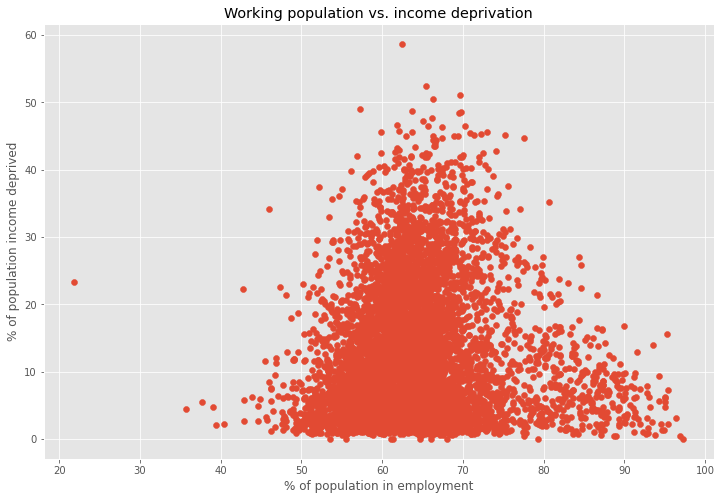

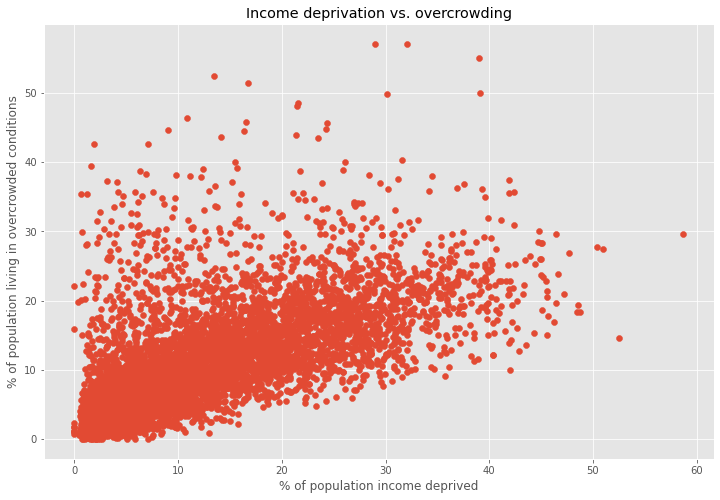

In [6]:
plt.scatter(x=df['Working_Age_population']/df['Total_population']*100, y=df['income_count']/df['Total_population']*100)
plt.title('Working population vs. income deprivation')
plt.xlabel('% of population in employment')
plt.ylabel('% of population income deprived')
#plt.ylim([0, 100])
plt.show()

#There doesn't appear to be a strong relationship between the percentage of the population in employment and income deprivation.

plt.scatter(x=df['income_count']/df['Total_population']*100, y=df['overcrowded_count']/df['Total_population']*100)
plt.title('Income deprivation vs. overcrowding')
plt.xlabel('% of population income deprived')
plt.ylabel('% of population living in overcrowded conditions')
#plt.ylim([0, 100])
plt.show()

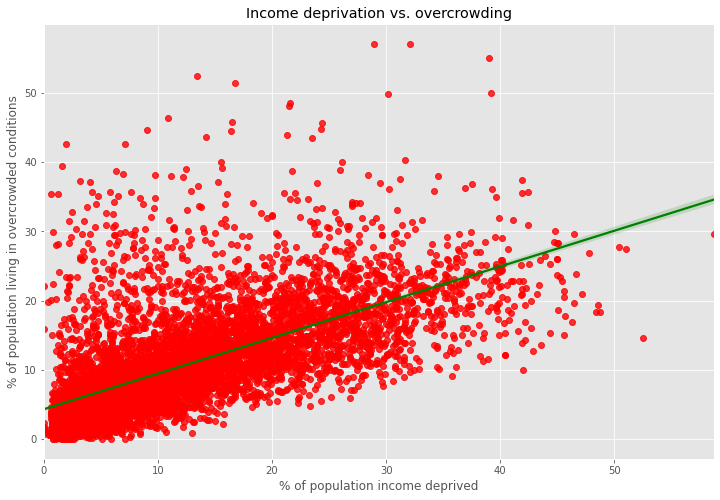

Correlation coefficient is 0.6550591658544407


In [7]:
sx = df['income_count']/df['Total_population']*100
sy = df['overcrowded_count']/df['Total_population']*100

sns.regplot(x=sx, 
            y=sy, 
            #data=df, 
            scatter_kws={"color": "red"}, 
            line_kws={"color":"green"})
plt.title('Income deprivation vs. overcrowding')
plt.xlabel('% of population income deprived')
plt.ylabel('% of population living in overcrowded conditions')
plt.show()

w = "Correlation coefficient is "
corrco = str(sx.corr(sy))
print (w + corrco)

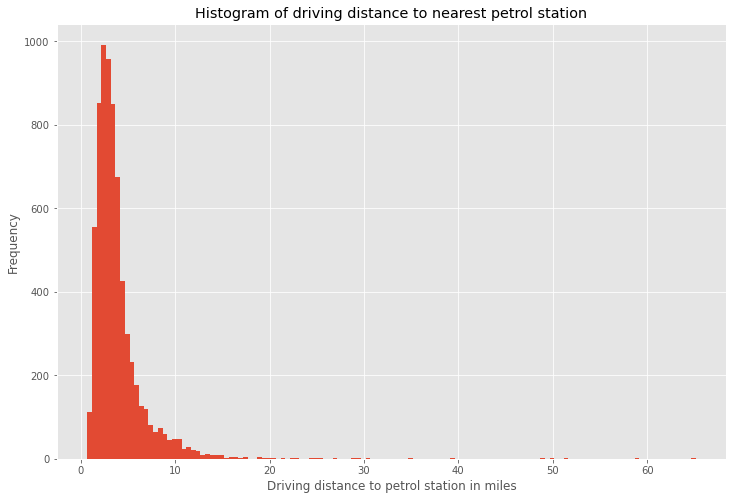

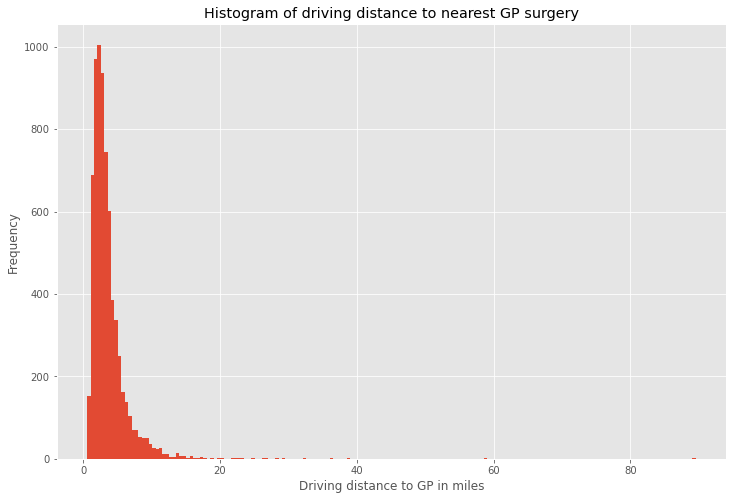

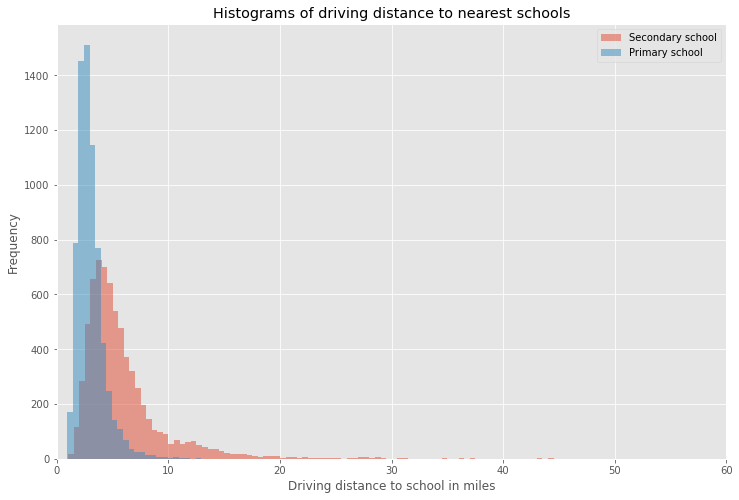

,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_Age_population,SIMD2020v2_Rank,SIMD_2020v2_Percentile,SIMD2020v2_Vigintile,SIMD2020v2_Decile,SIMD2020v2_Quintile,...,drive_petrol,drive_GP,drive_post,drive_primary,drive_retail,drive_secondary,PT_GP,PT_post,PT_retail,broadband
0,S01006506,Culter,Aberdeen City,894,580,4691,68,14,7,4,...,2.540103,3.074295,1.616239,2.615747,1.544260,9.930833,8.863589,5.856135,6.023406,11%
1,S01006507,Culter,Aberdeen City,793,470,4862,70,14,7,4,...,3.915072,4.309812,2.555858,3.646697,2.849656,11.042816,9.978272,7.515000,7.926029,1%
2,S01006508,Culter,Aberdeen City,624,461,5686,82,17,9,5,...,3.323025,3.784549,1.440991,3.247325,2.062255,10.616768,8.620700,4.321493,5.770910,1%
3,S01006509,Culter,Aberdeen City,537,307,4332,63,13,7,4,...,2.622991,2.778026,2.620681,1.936908,2.160142,10.036471,7.935112,8.433328,8.329819,11%
4,S01006510,Culter,Aberdeen City,663,415,3913,57,12,6,3,...,2.115004,2.358335,2.408416,1.845672,1.784635,9.650000,5.568964,6.966429,6.632609,0%


In [35]:
#Use histograms to visually assess normality of data.

w = 0.5
plt.hist(x=df['drive_petrol'], bins=np.arange(min(df['drive_petrol']), max(df['drive_petrol']) + w, w))
plt.xlabel('Driving distance to petrol station in miles')
plt.ylabel('Frequency')
plt.title('Histogram of driving distance to nearest petrol station')
plt.show()

plt.hist(x=df['drive_GP'], bins=np.arange(min(df['drive_GP']), max(df['drive_GP']) + w, w))
plt.xlabel('Driving distance to GP in miles')
plt.ylabel('Frequency')
plt.title('Histogram of driving distance to nearest GP surgery')
plt.show()

plt.hist(x=df['drive_secondary'], alpha=0.5, bins=np.arange(min(df['drive_secondary']), max(df['drive_secondary']) + w, w), label = 'Secondary school')
plt.hist(x=df['drive_primary'], alpha=0.5, bins=np.arange(min(df['drive_primary']), max(df['drive_primary']) + w, w), label = 'Primary school')
plt.legend(loc='upper right')
plt.xlabel('Driving distance to school in miles')
plt.ylabel('Frequency')
plt.title('Histograms of driving distance to nearest schools')
#Distances over 60 miles typically represent island communities where secondary pupils commute by ferry and board, e.g. in Oban/Fort William.
plt.xlim([0, 60])
plt.show()

df.head()

#Data is non-parametric. Noticeably right skewed.